# Dimension Reduction Visualizations

In this notebook, we will do a dimensionality reduction for data visualization in 2d and 3d.

We will use 3 methods:

[-**Principal Component Analysis (PCA):**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space, while retaining most of the variation.

[-**T-distributed Stochastic Neighbor Embedding (t-SNE):**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) Statistical tool to visualize high-dimensional data. It models each high-dimensional object by a 2 (or 3) dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability. 


[-**Linear Discriminant Analysis (LDA):**](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) Supervised method that computes the directions that will represent axes that maximize the separation between the classes.

For the 2d plots we will use seaborn and for the 3d plots, we will use [plotly.express](https://plotly.com/python/plotly-express/).


In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from warnings import simplefilter
from scipy.sparse import vstack
# ignore all future warnings - t-SNE have future warnings
simplefilter(action='ignore', category=FutureWarning)

In [23]:
path='/home/maggie/News_classifier/4.Features_Creation/' 

# features_train 
with open(path + 'features_train.pickle', 'rb') as file:
    features_train=pickle.load(file)

# features_test - back to a numpy array
with open(path + 'features_test.pickle', 'rb') as file:
    features_test=pickle.load(file)
    
# y_train
with open(path + 'y_train.pickle', 'rb') as file:
    y_train=pickle.load(file)
    
# y_test
with open(path + 'y_test.pickle', 'rb') as file:
    y_test=pickle.load(file)


In [24]:
print(features_train.shape)
print(features_test.shape)
print(y_train.shape)
print(y_test.shape)

(16728, 8257)
(7170, 8257)
(16728,)
(7170,)


We join the train and test, both features and labels.

In [26]:
features=vstack((features_train, features_test), format='csr')
y = np.concatenate((y_train,y_test), axis=0)

In [27]:
print(features.shape)
print(y.shape)

(23898, 8257)
(23898,)


In [28]:
# PCA and LDA do not support sparse input
features=features.toarray()

In [11]:
reversed_label_codes={}
categorias=['Cultura y Espectáculos', 'Deportes', 'Economía','Internacional','Política','Sociedad/Policiales']
for num in [0,1,2,3,4,5]:
    reversed_label_codes[num]=categorias[num]
categoria=[reversed_label_codes[num] for num in y]

### PCA 

#### 2-dimensional PCA

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

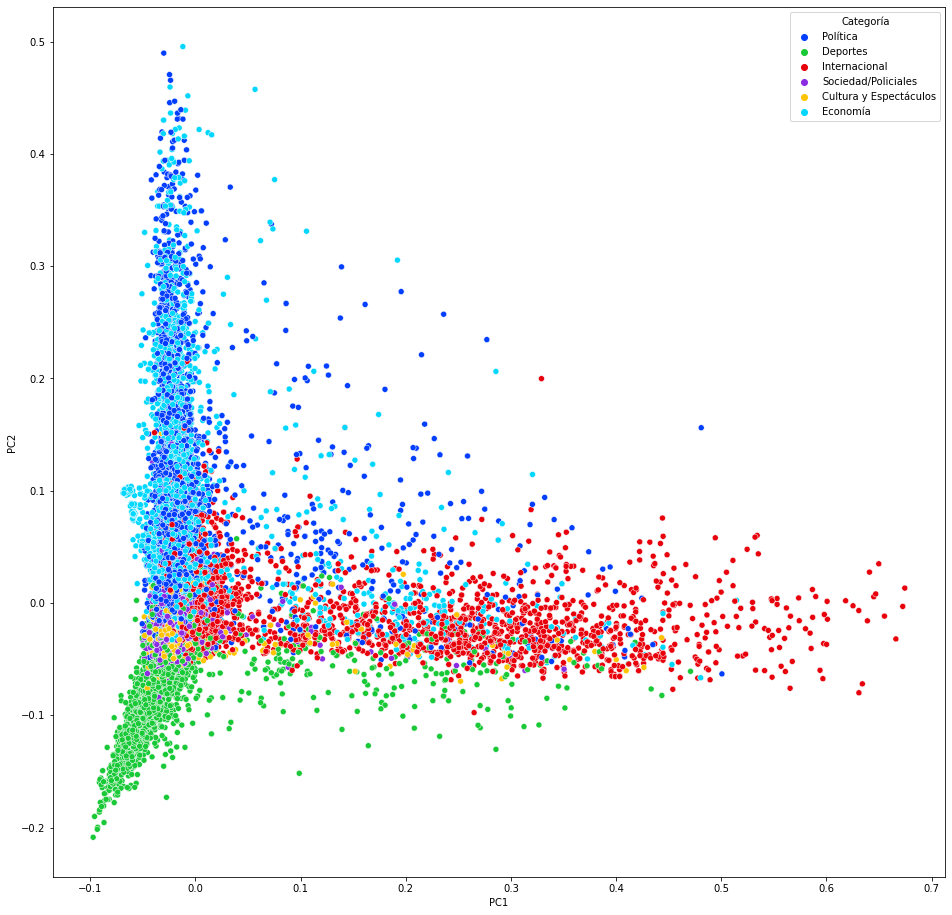

In [8]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)
pca_data = pd.DataFrame(data = pca_result , columns = ['PC1', 'PC2'])
pca_data['Categoría'] = categoria
plt.figure(figsize=(16,16))
sns.scatterplot( x='PC1', y='PC2',data=pca_data,hue='Categoría',palette='bright6')

Let's see the amount of variance explained by each of the selected components and between both components.

In [9]:
pca.explained_variance_

array([0.00734656, 0.00588965])

In [10]:
np.sum(pca.explained_variance_)

0.013236209715071393

It is very low. 

#### 3-dimensional PCA

In [11]:
pca3 = PCA(n_components=3)
pca3_result = pca3.fit_transform(features)

In [12]:
#we will use this map
category_names=['Política','Deportes','Internacional','Sociedad/Policiales','Cultura y Espectáculos','Economía']
colors_discrete_map={category_names[i]:sns.color_palette('bright6', as_cmap=True)[i] for i in range(len(category_names))}

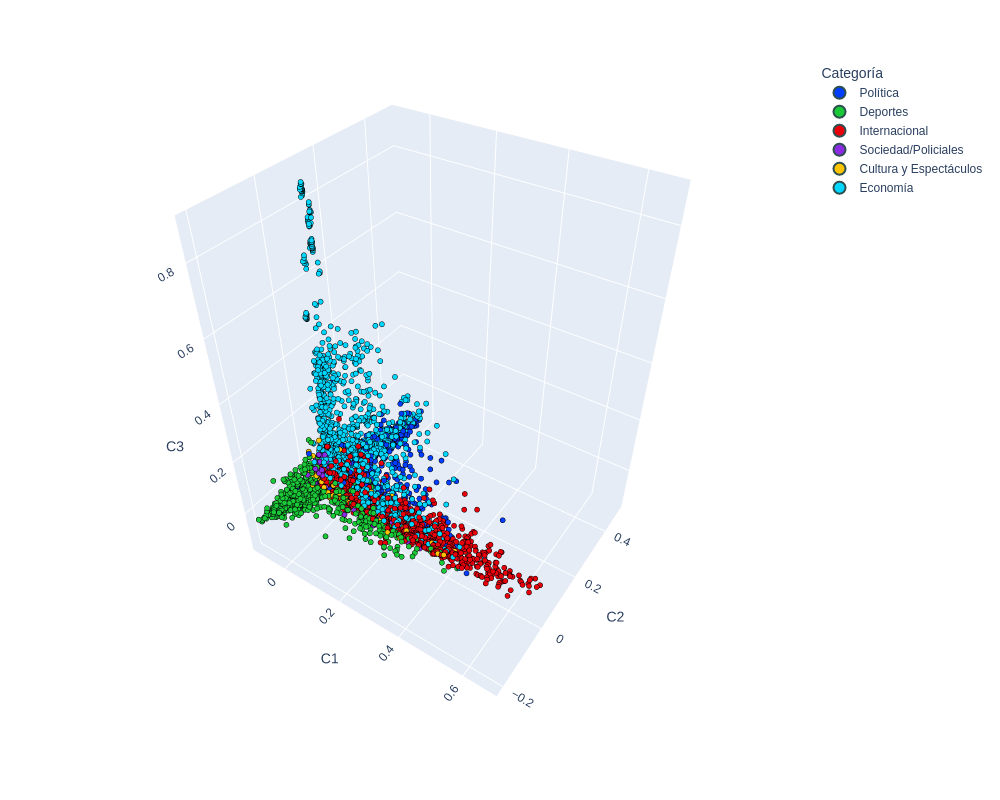

In [13]:
pca3_data = pd.DataFrame(data = pca3_result , columns = ['C1', 'C2','C3'])
pca3_data['Categoría'] =categoria
fig = px.scatter_3d(pca3_data, x='C1', y='C2', z='C3',
              color='Categoría',
            color_discrete_map=colors_discrete_map)
fig.update_traces(marker=dict(size=3,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
camera = dict(eye=dict(x=1., y=-1.5, z=1.5))
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
    legend=dict(itemsizing='constant'),scene_camera=camera)
fig.show("png")

We use the command fig.show("png") to show a static image of this plot in this notebook, but you can play with this interactive plot, and the following ones, in Jupyter Notebook.

In [14]:
print(np.sum(pca3.explained_variance_ratio_))

0.018820117515734317


The amount of variance is very low.

### t-SNE

#### 2-dimensional t-SNE

<AxesSubplot:xlabel='C1', ylabel='C2'>

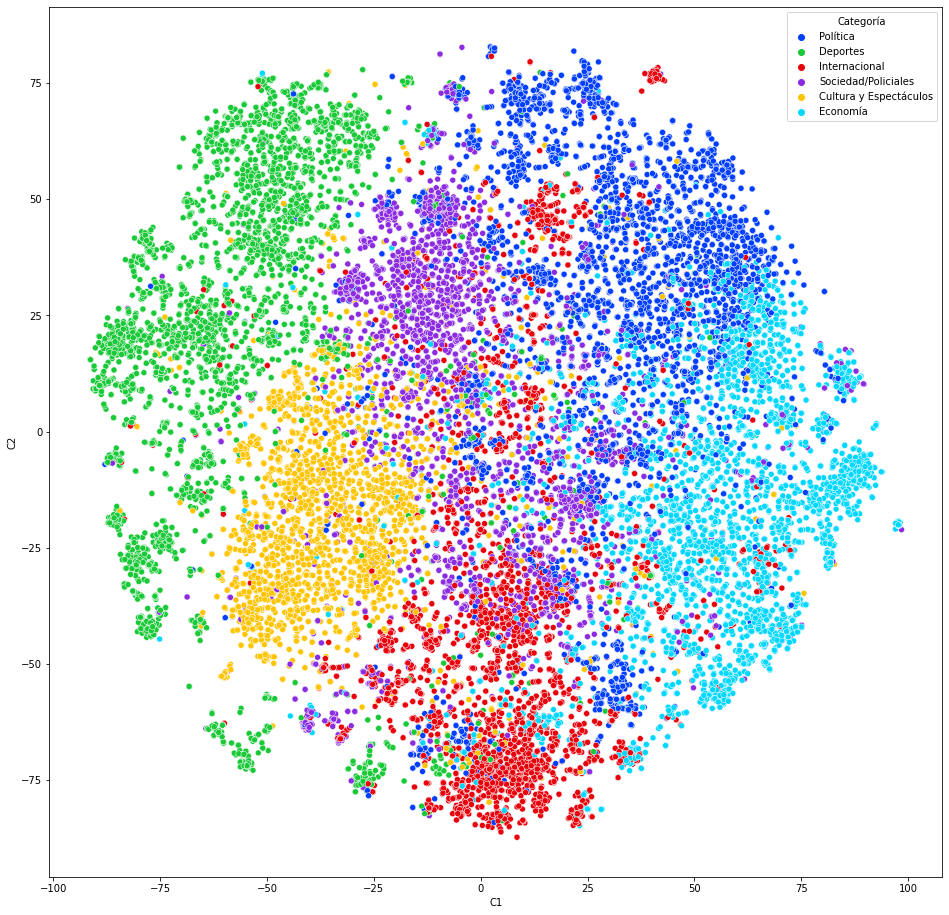

In [15]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(features)
tsne_data = pd.DataFrame(data = tsne_result , columns = ['C1', 'C2'])
tsne_data['Categoría'] = categoria
plt.figure(figsize=(16,16))
sns.scatterplot( x='C1', y='C2',data=tsne_data,hue='Categoría',palette='bright6')

Some categories are more separated than others.

The [documentation for sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) recommends using another dimensionality reduction method to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. We will then first do a dimension reduction with PCA.

In [16]:
pca50 = PCA(n_components=50)
pca_result50 = pca50.fit_transform(features)
print(np.sum(pca50.explained_variance_ratio_))

0.10071890806565896


Again, the amount of variance is low.

<AxesSubplot:xlabel='C1', ylabel='C2'>

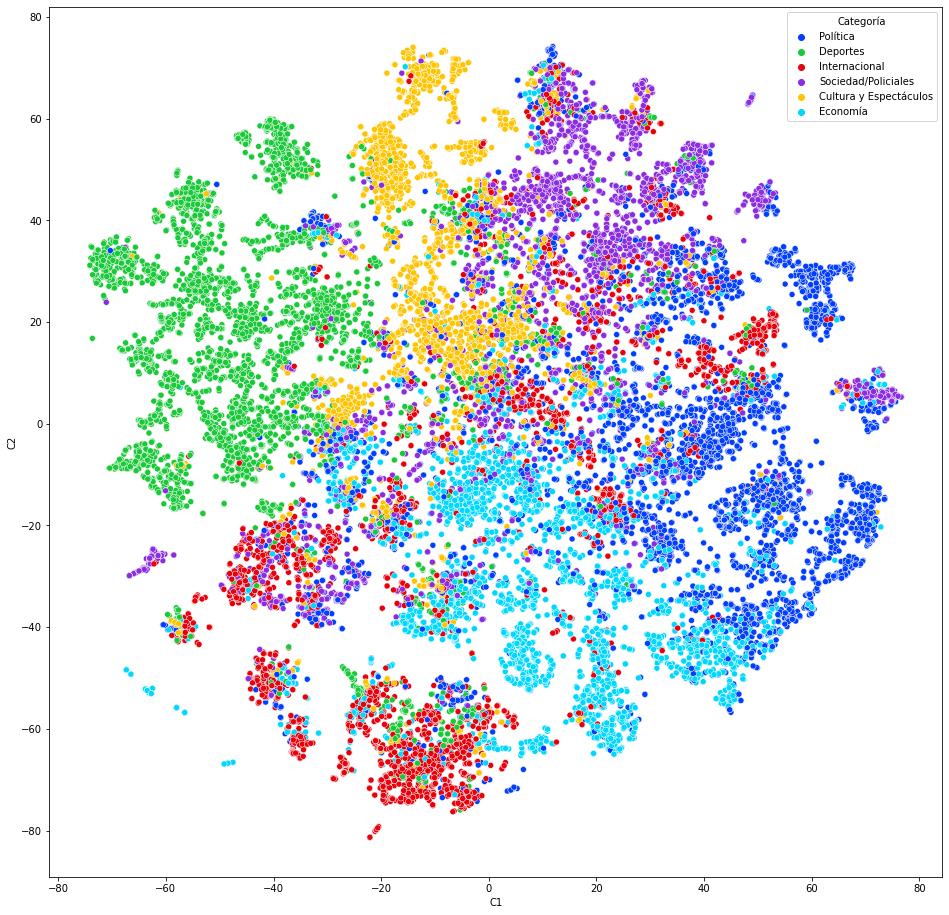

In [17]:
tsne = TSNE(n_components=2)
tsne_result50 = tsne.fit_transform(pca_result50)
tsne_data = pd.DataFrame(data = tsne_result50 , columns = ['C1', 'C2'])
tsne_data['Categoría'] = categoria
plt.figure(figsize=(16,16))
sns.scatterplot( x='C1', y='C2',data=tsne_data,hue='Categoría',palette='bright6')

It is not much better than the previous one.

#### 3-dimensional t-SNE

In [18]:
tsne3 = TSNE(n_components=3)
tsne3_result = tsne3.fit_transform(features)

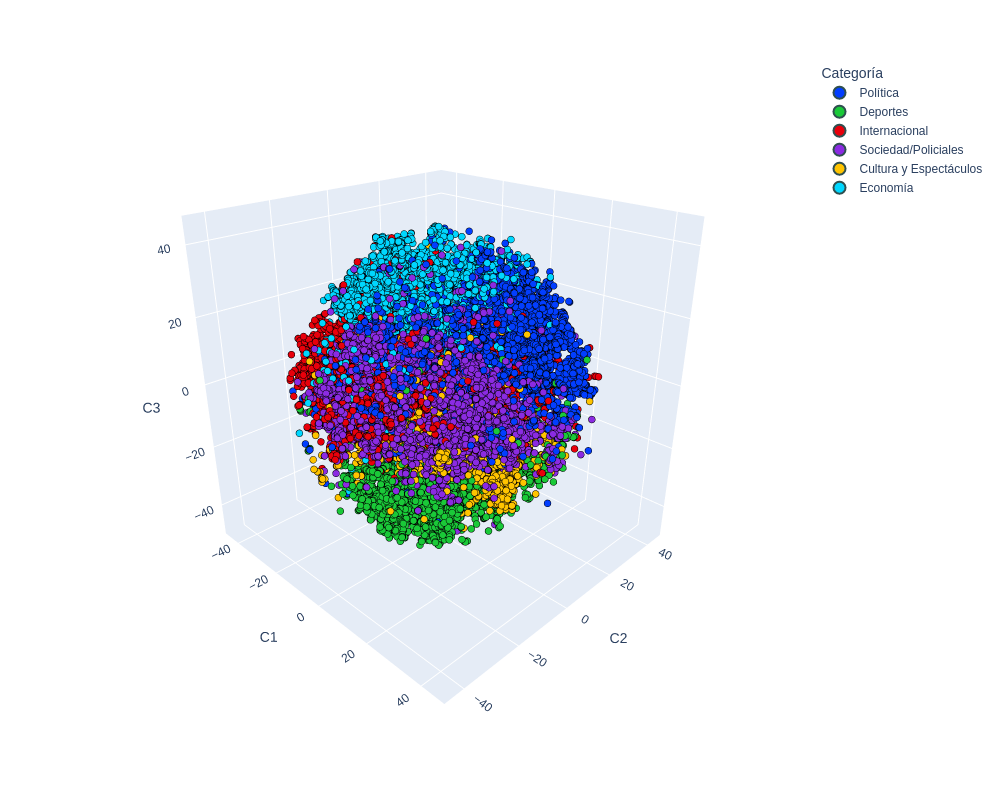

In [19]:
tsne3_data = pd.DataFrame(data = tsne3_result , columns = ['C1', 'C2','C3'])
tsne3_data['Categoría'] =categoria
fig = px.scatter_3d(tsne3_data, x='C1', y='C2', z='C3',
              color='Categoría',
            color_discrete_map=colors_discrete_map)
fig.update_traces(marker=dict(size=4,
                              line=dict(width=0.1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

camera = dict(eye=dict(x=1.5, y=-1.5, z=1))
scene_camera=camera
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
    legend=dict(itemsizing='constant'),
scene_camera=camera)
fig.show("png")

After the PCA reduction:

In [20]:
tsne3 = TSNE(n_components=3)
tsne3_result50 = tsne3.fit_transform(pca_result50)


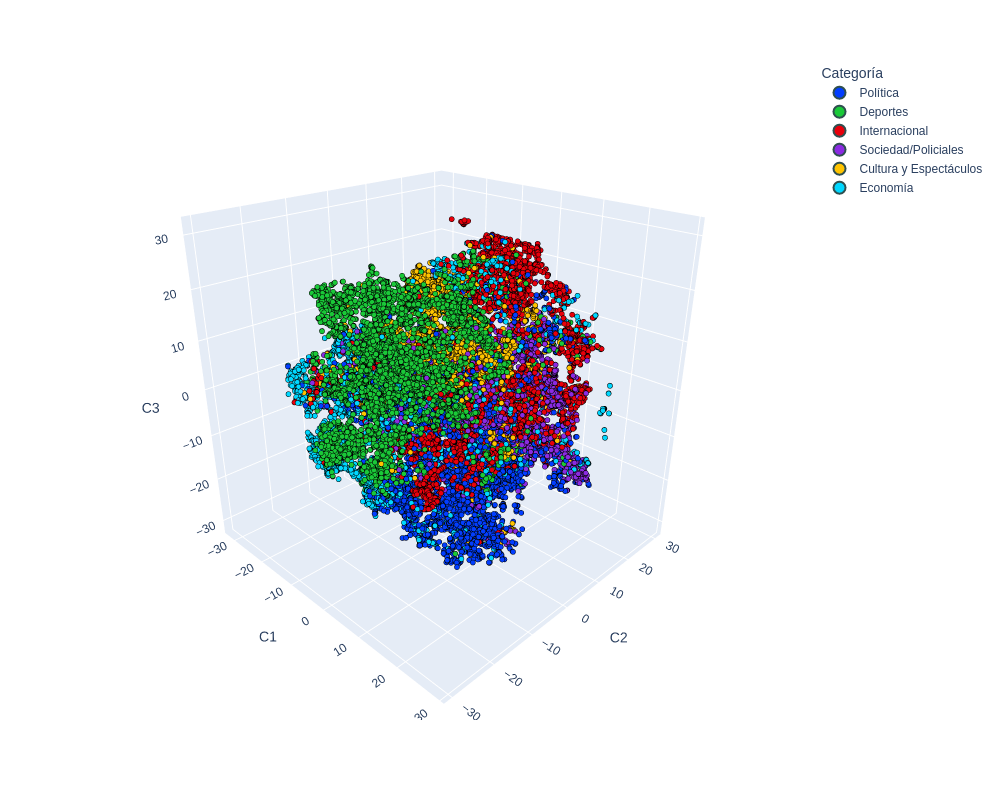

In [21]:
tsne3_data50 = pd.DataFrame(data = tsne3_result50 , columns = ['C1', 'C2','C3'])
tsne3_data50['Categoría'] =categoria
fig = px.scatter_3d(tsne3_data50, x='C1', y='C2', z='C3',
              color='Categoría',
            color_discrete_map=colors_discrete_map)
fig.update_traces(marker=dict(size=3,
                              line=dict(width=0.5,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
camera = dict(eye=dict(x=1.5, y=-1.5, z=1))
scene_camera=camera
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
    legend=dict(itemsizing='constant'),
scene_camera=camera)
fig.show("png")

### LDA

One difference between the previous visualizations is that LDA is a supervised method, we will use the labels to obtain the visualization.

#### 2-dimensional LDA

In [6]:
lda = LDA(n_components=2) 
lda_transformed = lda.fit_transform(features, y)

<AxesSubplot:xlabel='C1', ylabel='C2'>

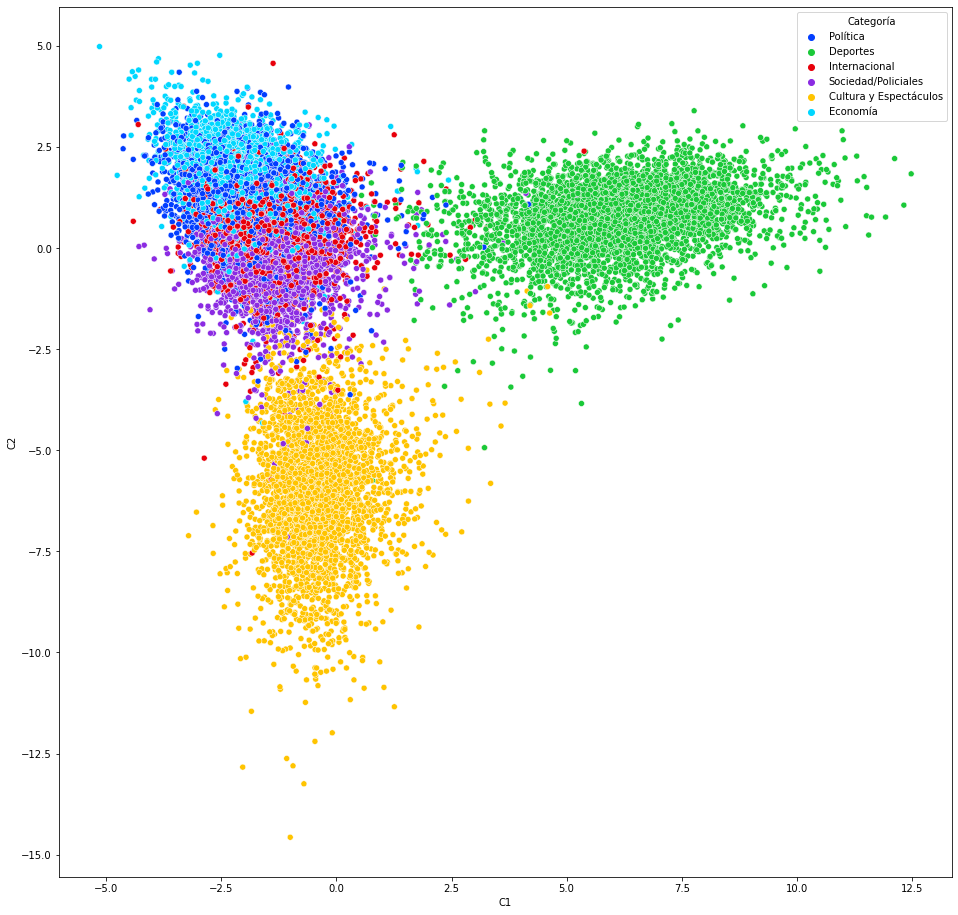

In [7]:
lda_data = pd.DataFrame(data = lda_transformed , columns = ['C1', 'C2'])
lda_data['Categoría'] =categoria
plt.figure(figsize=(16,16))
sns.scatterplot( x='C1', y='C2',data=lda_data,hue='Categoría',palette='bright6')

#### 3-dimensional LDA

In [8]:
#3-dimensional LDA
lda3 = LDA(n_components=3) 
lda3_transformed = lda3.fit_transform(features, y)

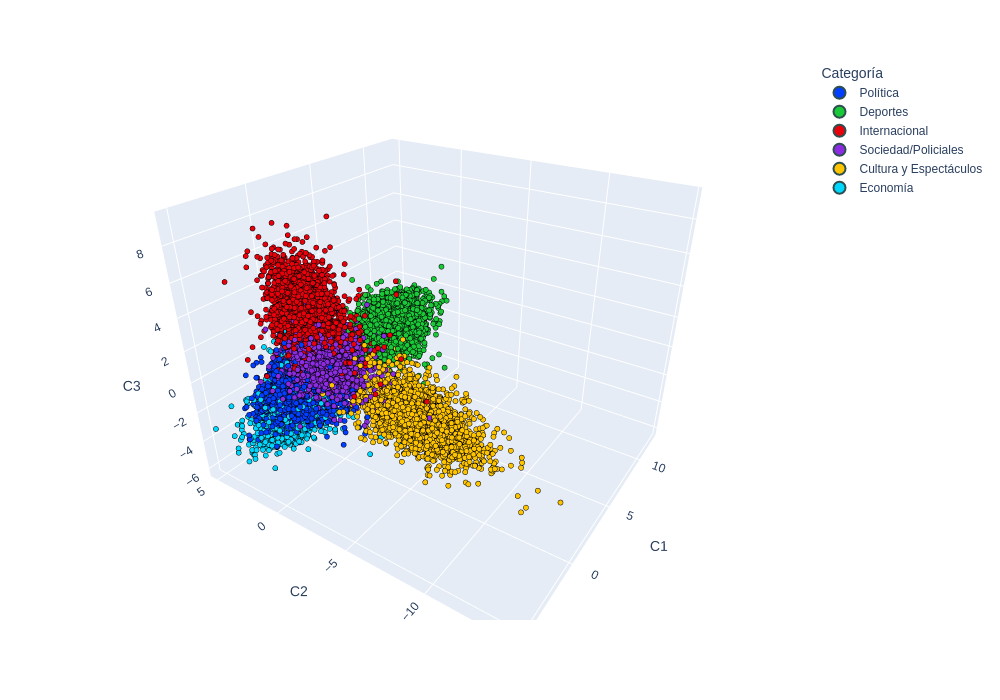

In [50]:
lda_data = pd.DataFrame(data = lda3_transformed , columns = ['C1', 'C2','C3'])
lda_data['Categoría'] =categoria
category_names=['Política','Deportes','Internacional','Sociedad/Policiales','Cultura y Espectáculos','Economía']
colors_discrete_map={category_names[i]:sns.color_palette('bright6', as_cmap=True)[i] for i in range(len(category_names))}
fig = px.scatter_3d(lda_data, x='C1', y='C2', z='C3',
              color='Categoría',
            color_discrete_map=colors_discrete_map)
fig.update_traces(marker=dict(size=3,
                              line=dict(width=0.5,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
#camera = dict(eye=dict(x=-1.25, y=-0.8, z=0.5))
camera = dict(eye=dict(x=-1.5, y=-1, z=1))
fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    legend=dict(itemsizing='constant'),
    scene_camera=camera)
fig.show("png")

In this visualization, the class separation is more clear than in the others.

These dimension reduction visualizations allow us to observe how is the separation between classes, considering the features we selected and using different algorithms. From these visualizations, we can expect to find a machine learning model that has good accuracy for this multiclass classification problem.